In [1]:
import os

import numpy as np
from matplotlib import pyplot as plt

from pycorr import TwoPointCorrelationFunction, project_to_multipoles
from corr_plots import mock, get_average_multipole, plot_fiber_collisions, plot_delta_fiber_collisions

plt.style.use(os.path.join(os.path.abspath(''), 'plot_style.mplstyle'))

<Figure size 1500x1000 with 0 Axes>

In [2]:
tracer = 'ELG'
footprint = 'SGC'
mock_id = 0

ells = [0, 2, 4]
nells = len(ells)

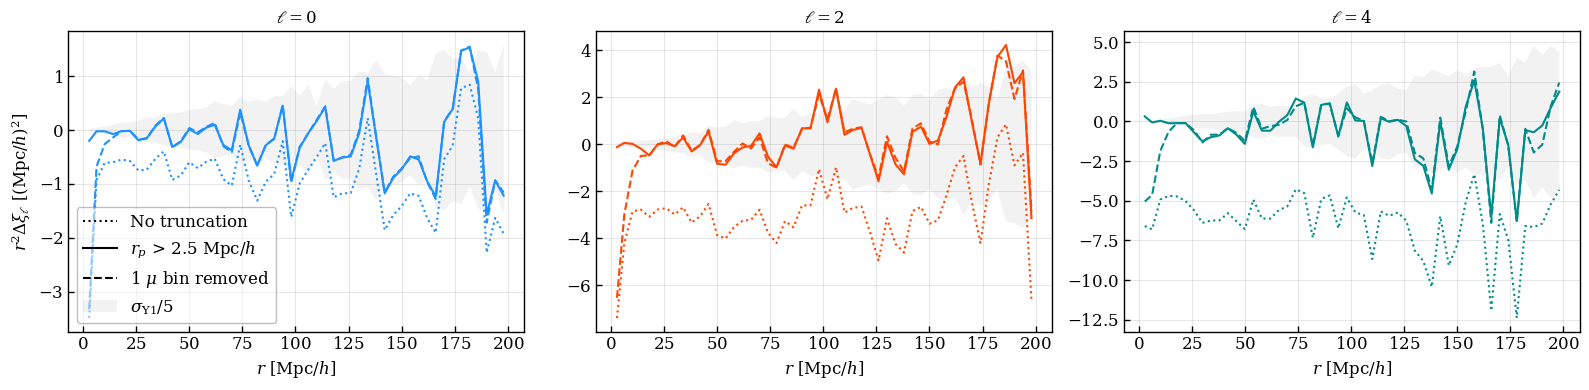

In [3]:
nmocks = 25
mocks = [mock(id, "SGC", 'ELG', rebin=(4, 1), rp_threshold=2.5) for id in range(nmocks)]
eSGC = plot_delta_fiber_collisions(mocks, ells)
fig = plt.gcf()
#for ax in fig.get_axes():
#    ax.set_xlim((0, 30))
plt.savefig('corr_FA-complete_SGC_ELG_rp_threshold.png')
plt.show()

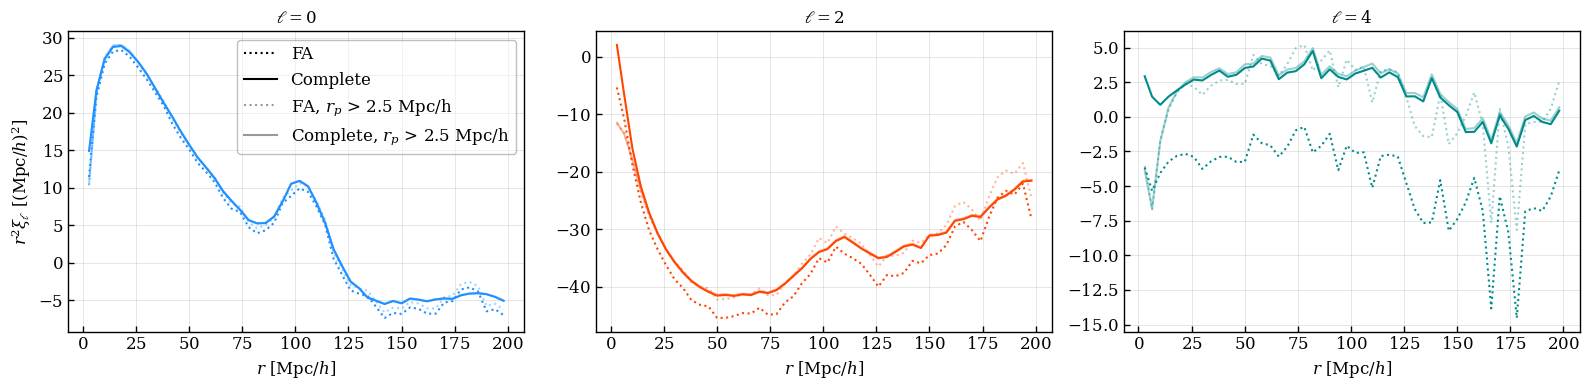

In [4]:
plot_fiber_collisions(mocks, mp=ells)
plt.savefig('corr_SGC_ELG_rp_threshold.png')
plt.show()

In [5]:
th = 2.5
mock_id = 0

xi_dir = "/global/u2/m/mpinon/outputs/"
xi_fn = 'corr_func_mock{:d}_{}_{{}}{}'.format(mock_id, tracer, footprint)
ext = '.npy'

xi_complete_nocut = TwoPointCorrelationFunction.load(xi_dir+xi_fn.format('complete_')+ext)[::10]
sep_nocut, xiell_complete_nocut = xi_complete_nocut.get_corr(return_sep=True, ells=ells, ignore_nan=True)

xi_fa_nocut = TwoPointCorrelationFunction.load(xi_dir+xi_fn.format('')+ext)[::10]
sep_nocut, xiell_fa_nocut = xi_fa_nocut.get_corr(return_sep=True, ells=ells, ignore_nan=True)

xi_fn += '_th{:.1f}'.format(th)

xi_complete = TwoPointCorrelationFunction.load(xi_dir+xi_fn.format('complete_')+ext)[::5]
sep, xiell_complete = xi_complete.get_corr(return_sep=True, ells=ells, ignore_nan=True)

xi_fa = TwoPointCorrelationFunction.load(xi_dir+xi_fn.format('')+ext)[::5]
sep, xiell_fa = xi_fa.get_corr(return_sep=True, ells=ells, ignore_nan=True)

In [6]:
nmocks = 1
mocks = [mock(id, footprint, tracer, rebin=(10, 1), rp_threshold=th) for id in range(nmocks)]

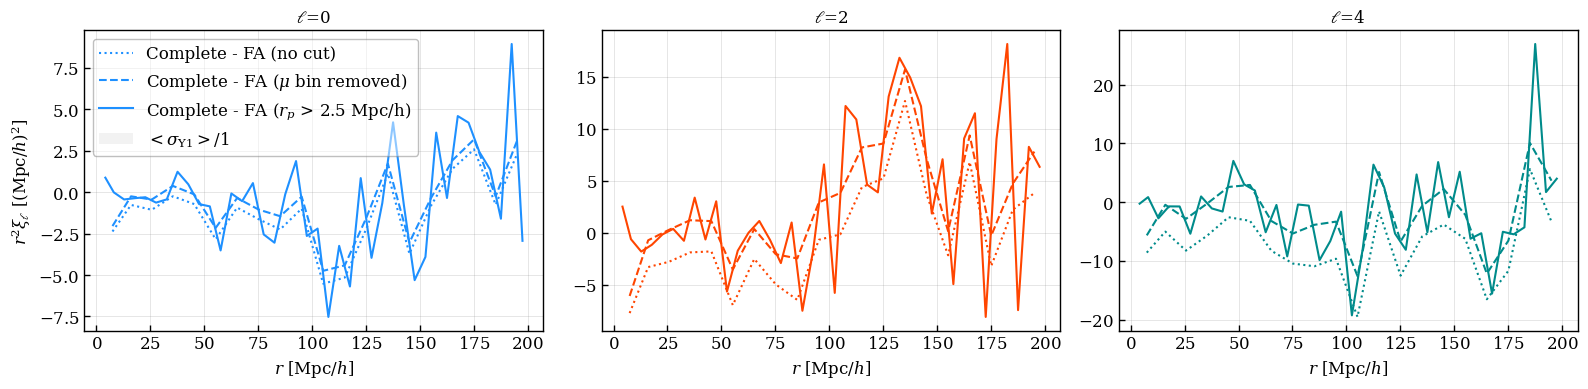

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
color=['dodgerblue', 'orangered', 'darkcyan', 'firebrick', 'violet', 'olivedrab', 'gold', 'limegreen', 'darkorange', 'darkviolet', 'deepskyblue']

for i, ell in enumerate(ells):
    axs[i].plot(sep_nocut, sep_nocut**2 * (xiell_fa_nocut[i] - xiell_complete_nocut[i]), color=color[i], ls=':', label='Complete - FA (no cut)')
    
    avg_mp = get_average_multipole(mocks, i)
    xi_complete_tr, std_complete_tr = avg_mp['xi_complete_mp_tr']
    xi_tr, std_tr = avg_mp['xi_mp_tr']
    r = mocks[0].xi_mp[0]
    axs[i].plot(r, r**2 * (xi_tr - xi_complete_tr), color=color[i], ls='--', label=r'Complete - FA ($\mu$ bin removed)')
    
    sep, _ = xi_complete.get_corr(return_sep=True, ells=ells)
    axs[i].plot(sep, sep**2 * (xiell_fa[i] - xiell_complete[i]), color=color[i], ls='-', label='Complete - FA ($r_p$ > 2.5 Mpc/h)')

    axs[i].fill_between(r, -std_complete_tr*r**2/np.sqrt(len(mocks)), std_complete_tr*r**2/np.sqrt(len(mocks)), label=r'$<\sigma_\mathrm{{Y1}}>/{:.0f}$'.format(np.sqrt(len(mocks))), facecolor='grey', alpha=0.1)

    axs[i].set_xlabel('$r$ [Mpc/$h$]')
    axs[i].set_title(r'$\ell$={:d}'.format(ell))
axs[0].set_ylabel(r'$r^2 \xi_\ell$ [$(\mathrm{Mpc}/h)^{2}$]')
axs[0].legend()
plt.show()

In [8]:
xi_fn = 'corr_func_mock{:d}_{}_{{}}{}'.format(mock_id, tracer, footprint)
xi_fn += '_th{:.1f}'.format(th)

In [9]:
xi_complete = TwoPointCorrelationFunction.load(xi_dir+xi_fn.format('complete_')+ext)

In [10]:
mu_vals = np.linspace(-1, 1, 401)
s_vals = 2.5 / np.sqrt(1 - mu_vals**2)

/tmp/ipykernel_177295/2388364089.py:2: RuntimeWarning: divide by zero encountered in true_divide
  s_vals = 2.5 / np.sqrt(1 - mu_vals**2)


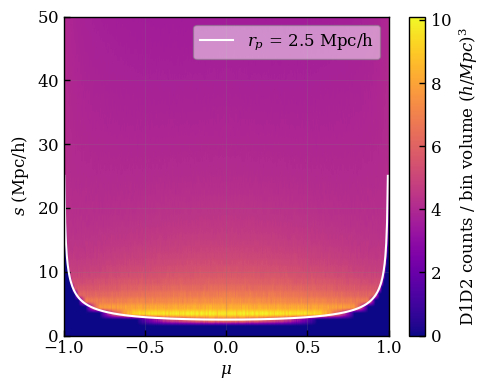

In [11]:
extent = np.min(xi_complete.edges[1]), np.max(xi_complete.edges[1]), np.min(xi_complete.edges[0]), np.max(xi_complete.edges[0])
plt.figure(figsize=(5, 4))
norm = 4/3 * np.pi * (xi_complete.edges[0][1:]**3 - xi_complete.edges[0][:-1]**3)
c = plt.imshow(xi_complete.D1D2.wcounts / norm[:, None], origin='lower', extent=extent, aspect='auto')
plt.colorbar(c, ax=plt.gca(), label=r'D1D2 counts / bin volume $(h/Mpc)^3$')
plt.plot(mu_vals, s_vals, color='white', label=r'$r_p$ = 2.5 Mpc/h')
plt.legend()
plt.ylim((0, 50))
plt.xlabel(r"$\mu$")
plt.ylabel(r"$s$ (Mpc/h)")
plt.savefig('s_mu_DDcounts', dpi=200)
plt.show()